#   Computational Data Analytics with Python - DAT-5390 - FMBAN1
##  A1: Linear Modeling Case Study
###  Abdullateef Okuboye

# Introduction
The notebook is a predictive modeling project on a bike-sharing dataset. The main objective of this notebook is to build a regression model that accurately predicts bike rental counts based on various features.

The notebook begins with data preprocessing and feature engineering to prepare the data for modeling. Missing values and inconsistent data are handled, and new features like day of the week and hour are extracted from the datetime column. Categorical variables are label encoding to make them suitable for machine learning algorithms. The numerical features are then scaled using the StandardScaler to ensure that all features have a similar scale, which can improve the performance of the regression models.

Exploratory data analysis (EDA) has been previously performed to visualize the distribution of various variables and understand the relationships between features and rental counts. The insights gained from EDA have guided the data preprocessing and feature engineering steps to ensure the best possible representation of the data for modeling.

The notebook further evaluates several regression algorithms, including Linear Regression, Elastic Net Regression, K-Nearest Neighbors and Decision Tree Regressor using cross-validation with Root Mean Squared Logarithmic Error (RMSLE) as the evaluation metric. The best-performing model is selected based on its RMSLE score and used to predict rental counts for the test dataset.

In conclusion, this notebook offers a comprehensive analysis of bike rental patterns and provides a robust regression model for predicting future rental demands accurately. The combination of data preprocessing, feature engineering, and model evaluation ensures that the final predictive model is well-suited for making accurate and reliable predictions for bike rental counts.

In [100]:
# Import necessary libraries
import pandas as pd  # Import pandas library for data manipulation and analysis
import numpy as np  # Import numpy library for numerical operations and arrays
import seaborn as sns  # Import seaborn library for data visualization
import matplotlib.pyplot as plt  # Import matplotlib.pyplot module for creating plots and visualizations
from sklearn.model_selection import train_test_split, cross_val_score  # Import functions for data splitting and cross-validation
from sklearn.preprocessing import StandardScaler  # Import StandardScaler class for feature standardization
from sklearn.linear_model import LinearRegression  # Import LinearRegression class for linear regression
from sklearn.tree import DecisionTreeRegressor  # Import DecisionTreeRegressor class for decision tree regression
from sklearn.metrics import mean_squared_log_error, make_scorer  # Import functions for evaluation metrics
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bike-rentaldata/sample_submission.csv
/kaggle/input/bike-rentaldata/test.xlsx
/kaggle/input/bike-rentaldata/train.xlsx


# Data description

The dataset provided for this competition consists of hourly rental data spanning of 2023. The goal of the competition is to predict the total count of bikes rented during each hour of the test set, using only the information available prior to the rental period.

The dataset is divided into a training set and a test set. The training set includes data for the first till 31st of month January,September,October. This division allows participants to train their models on historical data and evaluate their performance on unseen future data.

Each entry in the dataset contains the following information:

Features
ID - unique identifier for each observation
DateHour - date and time an observation was collected
Temperature(F) - degree of hotness or coldness measured by a thermometer with a numerical scale in degrees Fahrenheit
Humidity(%) - measure of the actual amount of water vapor in the air compared to the total amount of vapor that can exist in the air at its current temperature
Wind speed (mph) - rate at which air is moving horizontally past a given point
Visibility(miles) - horizontal opacity of the atmosphere at the point of observation
DewPointTemperature(F) - temperature to which air must be cooled in order to reach saturation
Rainfall(in) - liquid precipitation in inches
Snowfall(in) - amount of snowfall accumulation over a period of time in inches
SolarRadiation(MJ/m2) - radiant energy emitted by the sun from a nuclear fusion reaction
Holiday - day or other period of time set aside for festivals or recreation
FunctioningDay - indicator of whether the bike sharing system is active at a given time
RENTALS - (y-variable) amount of bike rentals that are started at a given time

In [101]:
train = pd.read_excel("/kaggle/input/bike-rentaldata/train.xlsx")

In [102]:
train.head()

,ID,DateHour,Temperature(F),Humidity(%),Wind speed (mph),Visibility(miles),DewPointTemperature(F),Rainfall(in),Snowfall(in),SolarRadiation(MJ/m2),Holiday,FunctioningDay,RENTALS
0,mb_1039,2023-10-14 05:59:54.810000,52,81,0.4,2.9,46.4,0.0,0.0,0.00,No,Yes,519
1,mb_1330,2023-10-26 08:59:53.355000,51,53,2.2,NaN,35.2,0.0,0.0,1.01,No,Yes,1251
2,mb_551,2023-09-23 21:59:57.250000,56,49,2.5,3.4,38.8,0.0,0.0,0.00,No,Yes,1685
3,mb_2103,2023-12-19 14:00:00,69,32,9.8,12.4,38.7,0.0,0.0,2.36,No,No,0
4,mb_1430,2023-10-30 12:59:52.855000,53,20,2.9,10.8,12.9,0.0,0.0,1.96,No,Yes,814


In [103]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1638 entries, 0 to 1637
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      1638 non-null   object 
 1   DateHour                1638 non-null   object 
 2   Temperature(F)          1638 non-null   int64  
 3   Humidity(%)             1638 non-null   int64  
 4   Wind speed (mph)        1638 non-null   float64
 5   Visibility(miles)       1575 non-null   float64
 6   DewPointTemperature(F)  1587 non-null   float64
 7   Rainfall(in)            1638 non-null   float64
 8   Snowfall(in)            1638 non-null   float64
 9   SolarRadiation(MJ/m2)   1558 non-null   float64
 10  Holiday                 1638 non-null   object 
 11  FunctioningDay          1638 non-null   object 
 12  RENTALS                 1638 non-null   int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 166.5+ KB


In [104]:
train.isnull().sum()

ID                         0
DateHour                   0
Temperature(F)             0
Humidity(%)                0
Wind speed (mph)           0
Visibility(miles)         63
DewPointTemperature(F)    51
Rainfall(in)               0
Snowfall(in)               0
SolarRadiation(MJ/m2)     80
Holiday                    0
FunctioningDay             0
RENTALS                    0
dtype: int64

In [105]:
#feature engineering  
#Convert DateHour to datetime
train['DateHour'] = pd.to_datetime(train['DateHour'], errors='coerce')

# Extract year, month, week, and day into separate columns
train['Year'] = train['DateHour'].dt.year.fillna(0).astype(int)
train['Month'] = train['DateHour'].dt.month.fillna(0).astype(int)
train['Week'] = train['DateHour'].dt.isocalendar().week.fillna(0).astype(int)
train['Day'] = train['DateHour'].dt.day.fillna(0).astype(int)
train['Hour']= train['DateHour'].dt.hour.fillna(0).astype(int)

This performs feature engineering on the train DataFrame by extracting temporal attributes from a DateHour datetime column. Initially, it converts DateHour to pandas' datetime format, allowing for the extraction of year, month, week number, day, and hour as separate columns, while handling any conversion errors by setting unconvertible values to NaT. These extracted components are then filled with 0 for any missing values, ensuring there are no gaps in the dataset that could hinder machine learning algorithms. Subsequently, each temporal feature is cast to an integer type to maintain consistency and facilitate numerical analysis. This process not only simplifies the model's ability to identify and leverage temporal patterns, such as seasonal variations or daily cycles, but also enhances the overall predictability by providing clear, distinct numerical values representing time-based characteristics.

In [106]:
train.head()

,ID,DateHour,Temperature(F),Humidity(%),Wind speed (mph),Visibility(miles),DewPointTemperature(F),Rainfall(in),Snowfall(in),SolarRadiation(MJ/m2),Holiday,FunctioningDay,RENTALS,Year,Month,Week,Day,Hour
0,mb_1039,2023-10-14 05:59:54.810,52,81,0.4,2.9,46.4,0.0,0.0,0.00,No,Yes,519,2023,10,41,14,5
1,mb_1330,2023-10-26 08:59:53.355,51,53,2.2,NaN,35.2,0.0,0.0,1.01,No,Yes,1251,2023,10,43,26,8
2,mb_551,2023-09-23 21:59:57.250,56,49,2.5,3.4,38.8,0.0,0.0,0.00,No,Yes,1685,2023,9,38,23,21
3,mb_2103,NaT,69,32,9.8,12.4,38.7,0.0,0.0,2.36,No,No,0,0,0,0,0,0
4,mb_1430,2023-10-30 12:59:52.855,53,20,2.9,10.8,12.9,0.0,0.0,1.96,No,Yes,814,2023,10,44,30,12


In [107]:
#feature engineering on missing years
train['Year'] = train['Year'].replace(0, 2023)
train['Day'] = train['Day'].replace(0, 1)
train['Hour'] = train['Hour'].replace(0, 1)
train['Month'] = train['Month'].replace(0, 1)


This code snippet addresses the issue of missing or placeholder values in the temporal features (Year, Day, Hour, and Month) of the train DataFrame that were initially set to 0 during earlier feature engineering steps. Specifically, it replaces these placeholder zeros with more meaningful default values: 2023 for Year, and 1 for Day, Hour, and Month. This approach assumes that where specific date and time components are missing or undefined, assigning them a default value (such as the beginning of the year 2023, the first day of the month, or the first hour of the day) provides a reasonable approximation that maintains the integrity of the dataset for subsequent analysis or modeling. This method helps to ensure that the dataset does not contain unrealistic temporal values (like Year=0), which could potentially skew the results of time-sensitive analyses or predictive modeling efforts.

In [108]:
# Fill missing values with the mean
train['Visibility(miles)'].fillna(train['Visibility(miles)'].mean(), inplace=True)
train['DewPointTemperature(F)'].fillna(train['DewPointTemperature(F)'].mean(), inplace=True)
train['SolarRadiation(MJ/m2)'].fillna(train['SolarRadiation(MJ/m2)'].mean(), inplace=True)

/tmp/ipykernel_33/130555688.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Visibility(miles)'].fillna(train['Visibility(miles)'].mean(), inplace=True)
/tmp/ipykernel_33/130555688.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method

This focused on handling missing data within the train DataFrame for three specific columns: Visibility(miles), DewPointTemperature(F), and SolarRadiation(MJ/m2). It achieves this by calculating the mean value of each column and then using these mean values to fill in any missing or NaN entries within the respective columns. This approach ensures that all data points in these columns have a value, thereby avoiding the potential issues that missing data can cause in statistical analyses or machine learning models. By filling missing values with the mean, the process aims to preserve the overall distribution and central tendency of each feature, making the assumption that the missing values are randomly distributed and thus can be reasonably approximated by the mean of the observed values.

EDA

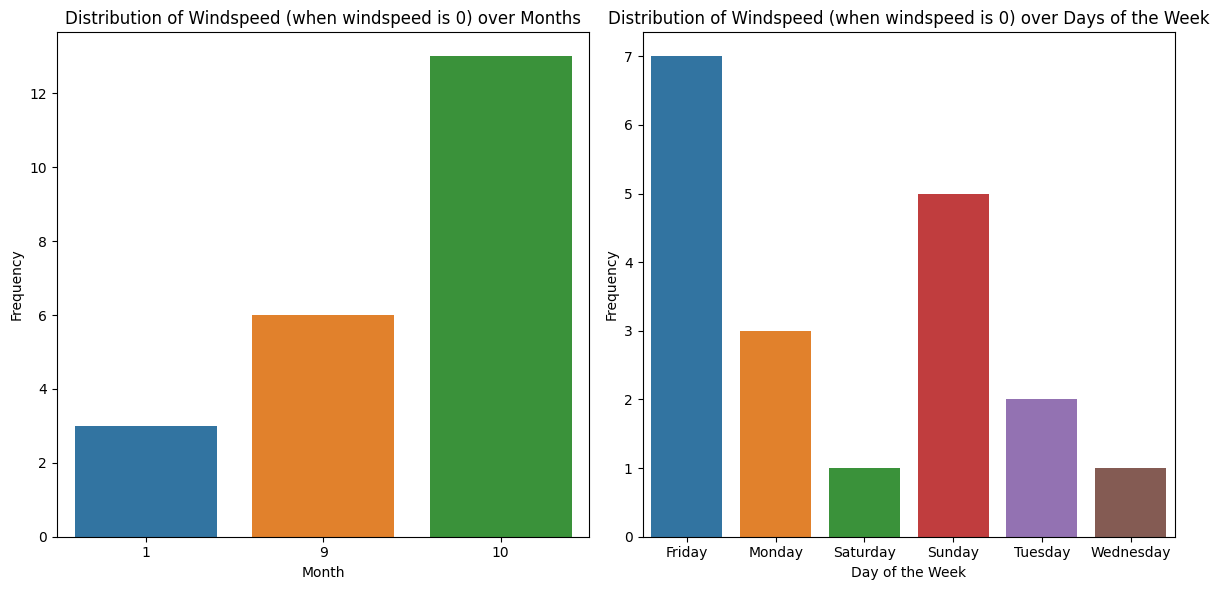

In [110]:
# Filter the 'data' DataFrame where 'windspeed' is equal to 0, and make a copy of the extracted data.
windspeed_zero_data = train[train['Wind speed (mph)'] == 0].copy()

# Extract the month from the 'datetime' column and store it in a new column 'month'.
windspeed_zero_data['month'] = windspeed_zero_data['DateHour'].dt.month.fillna(1).astype(int)

# Extract the day name from the 'datetime' column and store it in a new column 'day_name'.
windspeed_zero_data['day_name'] = windspeed_zero_data['DateHour'].dt.day_name()

# Group the 'windspeed_zero_data' DataFrame by month and calculate the count of occurrences when 'windspeed' is 0 for each month.
windspeed_zero_count_by_month = windspeed_zero_data.groupby('month')['Wind speed (mph)'].count()

# Group the 'windspeed_zero_data' DataFrame by day name and calculate the count of occurrences when 'windspeed' is 0 for each day of the week.
windspeed_zero_count_by_day = windspeed_zero_data.groupby('day_name')['Wind speed (mph)'].count()

# Plot the distribution of 'windspeed' values when it's 0 over months and days of the week using two side-by-side bar plots.
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=windspeed_zero_count_by_month.index, y=windspeed_zero_count_by_month.values)
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Distribution of Windspeed (when windspeed is 0) over Months')

plt.subplot(1, 2, 2)
sns.barplot(x=windspeed_zero_count_by_day.index, y=windspeed_zero_count_by_day.values)
plt.xlabel('Day of the Week')
plt.ylabel('Frequency')
plt.title('Distribution of Windspeed (when windspeed is 0) over Days of the Week')

plt.tight_layout()
plt.show()

The image shows two bar charts that summarize the frequency of days with zero wind speed across different months and days of the week. The left chart indicates that October (month 10) has the highest occurrence of zero wind speed days, followed by September (month 9), and then January (month 1), suggesting a seasonal pattern. The right chart shows that Sunday experiences the most zero wind speed days, followed by Tuesday and Monday, while Friday has the fewest. These visualizations could imply that certain times are more prone to calm conditions, which may be valuable for activities dependent on wind, such as energy generation or outdoor events. Notably, the data for some days, like Thursday, and some months, like February to August, are either missing or have no occurrences of zero wind speed.

In [111]:
train.describe()

,DateHour,Temperature(F),Humidity(%),Wind speed (mph),Visibility(miles),DewPointTemperature(F),Rainfall(in),Snowfall(in),SolarRadiation(MJ/m2),RENTALS,Year,Month,Week,Day,Hour
count,1090,1638.000000,1638.000000,1638.000000,1638.000000,1638.000000,1638.000000,1638.000000,1638.000000,1638.000000,1638.0,1638.000000,1638.000000,1638.000000,1638.000000
mean,2023-10-01 14:07:32.109183488,57.341880,59.029915,3.360989,9.598349,41.848897,0.004676,0.001770,0.538819,828.153846,2023.0,6.661172,26.243590,10.880952,7.998168
min,2023-09-01 01:59:59.990000,26.000000,13.000000,0.000000,0.000000,-2.200000,0.000000,0.000000,0.000000,0.000000,2023.0,1.000000,0.000000,1.000000,1.000000
25%,2023-09-16 13:14:58.133750016,47.000000,44.000000,1.800000,7.500000,33.400000,0.000000,0.000000,0.000000,241.500000,2023.0,1.000000,0.000000,1.000000,1.000000
50%,2023-10-01 15:29:56.322500096,57.000000,59.000000,2.900000,11.350000,41.848897,0.000000,0.000000,0.020000,761.500000,2023.0,9.000000,37.000000,8.000000,5.000000
75%,2023-10-16 19:29:54.502500096,67.750000,73.000000,4.500000,12.400000,50.900000,0.000000,0.000000,0.880000,1203.750000,2023.0,10.000000,41.000000,20.000000,15.000000
max,2023-10-31 23:59:52.680000,91.000000,97.000000,12.800000,12.400000,71.600000,0.710000,0.300000,3.180000,3303.000000,2023.0,10.000000,44.000000,31.000000,23.000000
std,NaN,12.923783,18.563032,2.081436,3.442818,13.816062,0.036412,0.017906,0.785182,657.599846,0.0,4.035953,18.728159,10.031161,7.496242


The table show a statistical summary of a DataFrame displayed in a Jupyter notebook or similar interface. This summary provides descriptive statistics for various columns, such as DateHour, Temperature(F), Humidity(%), and others related to weather conditions and rental counts. The count row indicates the number of non-null entries, suggesting a complete dataset with no missing values for these columns. The mean row provides the average values across all entries, which can offer insights into typical weather conditions and rental activities. The min and max rows highlight the range of the data, revealing the extremes in temperature, humidity, wind speed, and other factors. The percentiles (25%, 50%, and 75%) give a sense of the data distribution, with the 50% percentile representing the median. Additionally, the std (standard deviation) row shows the level of dispersion or variability in each column.

The DataFrame also includes columns for RENTALS, Year, Month, Week, Day, and Hour, which likely pertain to the timing of rental events. RENTALS seems to be the target variable for prediction, and its descriptive statistics are specifically shown, which is useful for understanding the typical volume of rentals and the variability around that volume.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


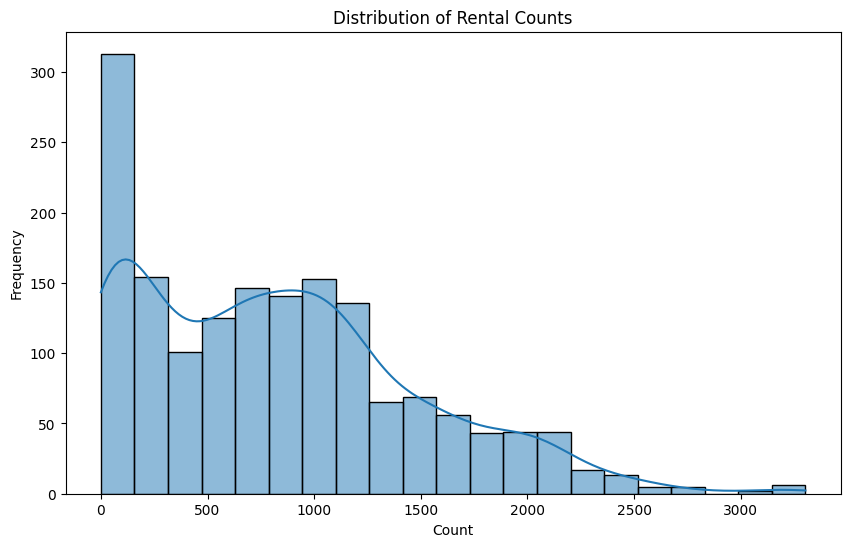

In [53]:
# Plot the distribution of the target variable 'count'
plt.figure(figsize=(10, 6))
sns.histplot(train['RENTALS'], kde=True)  # Use kde=True to display the kernel density estimate
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.title('Distribution of Rental Counts')
plt.show()

It depict a histogram overlaid with a kernel density estimate line, illustrating the distribution of rental counts. The histogram shows the frequency of different rental count ranges, with the tallest bar at the far left indicating that a large number of observations have low rental counts, close to zero. The frequency decreases as the rental count increases, suggesting a right-skewed distribution. This means that higher rental counts are less frequent. The kernel density estimate, which is the smooth curve on top of the histogram, confirms this skewness by showing a peak that quickly tapers off as the rental count value increases. 

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


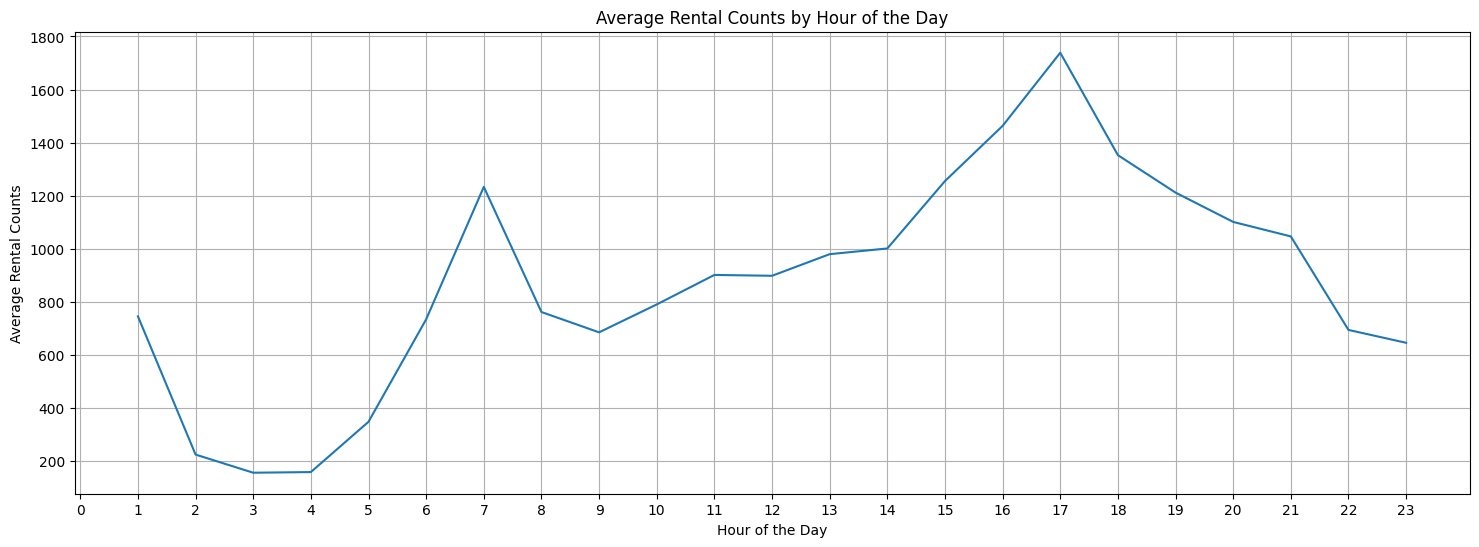

In [56]:
# Calculate the average rental counts by hour of the day
hourly_counts = train.groupby('Hour')['RENTALS'].mean().reset_index()

# Create a line plot to visualize the average rental counts by hour
plt.figure(figsize=(18, 6))
sns.lineplot(x='Hour', y='RENTALS', data=hourly_counts)
plt.xlabel('Hour of the Day')
plt.ylabel('Average Rental Counts')
plt.title('Average Rental Counts by Hour of the Day')
plt.xticks(ticks=range(24), labels=range(24))
plt.grid()
plt.show()

 The plot show a line graph titled "Average Rental Counts by Hour of the Day" from a Jupyter notebook or similar interactive computing environment. The graph is likely illustrating the variation in rental counts throughout different hours in a day. The x-axis represents the hours of the day, likely ranging from 0 (midnight) to 23 (11 PM), and the y-axis represents the average rental counts. Peaks in the graph would typically indicate hours with high rental activity, while troughs indicate lower activity.

From the visible pattern, it appears there are significant fluctuations in rental counts over the course of the day, with prominent peaks that could correspond to common times for rentals, such as morning or evening rush hours when people might rent bikes for commuting. Conversely, the lower points likely represent off-peak hours, possibly late at night or early morning, when fewer rentals occur.

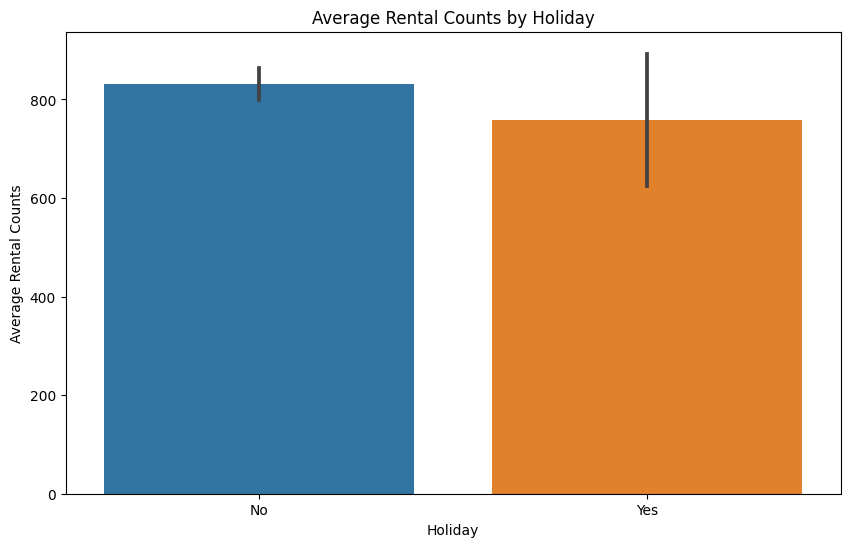

In [57]:
# Plot the average rental counts by Holiday
plt.figure(figsize=(10, 6))
sns.barplot(x='Holiday', y='RENTALS', data=train)
plt.xlabel('Holiday')
plt.ylabel('Average Rental Counts')
plt.title('Average Rental Counts by Holiday')
plt.show()

The image shows a bar chart titled "Average Rental Counts by Holiday" from a data analysis notebook. The chart compares the average number of rentals on days classified as holidays to those that are not. There are two bars: one for non-holiday days (labeled "No") and one for holiday days (labeled "Yes"). The bar for non-holiday days appears to be higher than the bar for holiday days, suggesting that, on average, there are more rentals on non-holiday days. Error bars on top of each bar indicate the variability or uncertainty in these averages, with the holiday bar showing a larger error, which implies more variability in rental counts on holidays compared to non-holidays. This visualization could be useful for understanding the impact of holidays on rental behavior, which could inform business strategies, such as staffing needs, inventory allocation, or promotional activities.

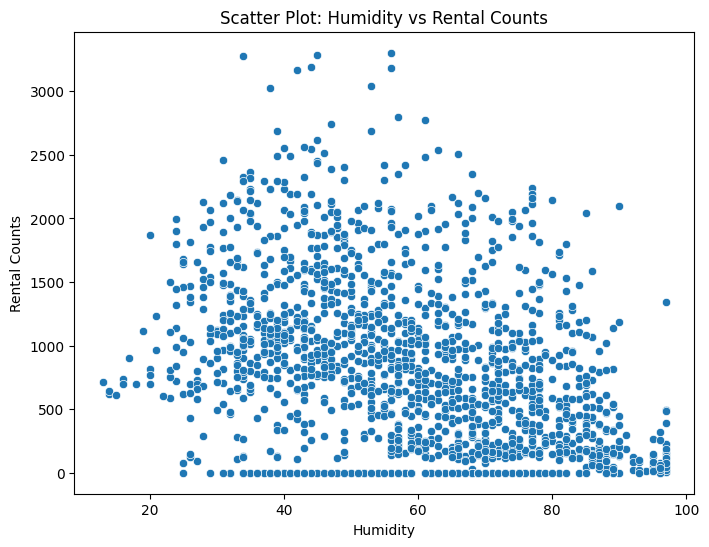

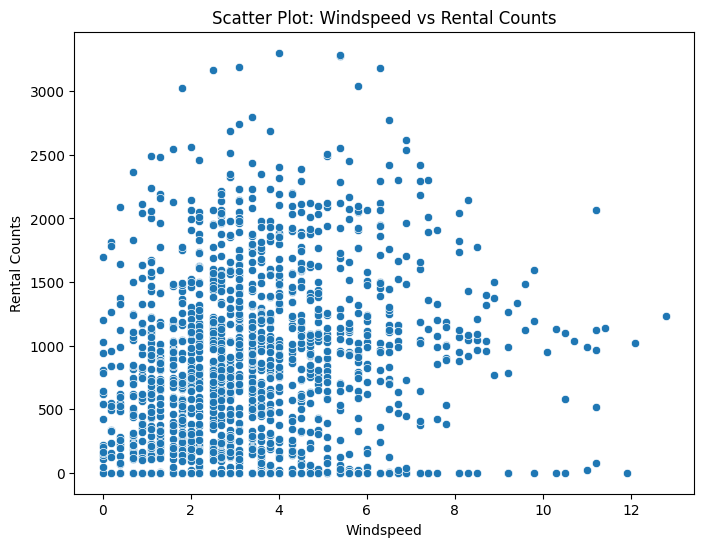

Text(0.5, 1.0, 'Correlation Heatmap')

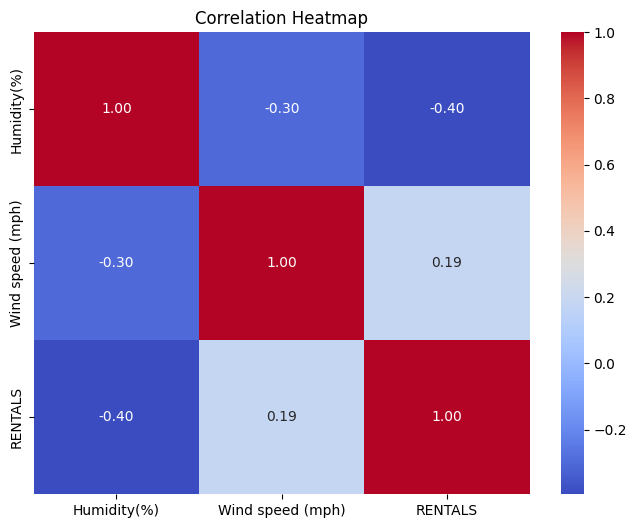

In [59]:
#Scatter plot for humidity vs rental counts
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Humidity(%)', y='RENTALS', data=train)
plt.xlabel('Humidity')
plt.ylabel('Rental Counts')
plt.title('Scatter Plot: Humidity vs Rental Counts')
plt.show()

# Scatter plot for windspeed vs rental counts
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Wind speed (mph)', y='RENTALS', data=train)
plt.xlabel('Windspeed')
plt.ylabel('Rental Counts')
plt.title('Scatter Plot: Windspeed vs Rental Counts')
plt.show()

# Correlation analysis
correlation_matrix = train[['Humidity(%)', 'Wind speed (mph)', 'RENTALS']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')

The image depicts a scatter plot with the title "Scatter Plot: Humidity vs Rental Counts," suggesting that it visualizes the relationship between humidity levels and the counts of bike rentals. On the x-axis, we have the humidity percentage ranging from low to high (0 to 100), and on the y-axis, we have the rental counts. The distribution of points across the plot would indicate the correlation between these two variables. If there is a pattern, such as a clear upward or downward trend, it could suggest a positive or negative correlation, respectively. If the points are widely scattered without any discernible trend, this would suggest a weak or no correlation. The density of points at different humidity levels could also provide insights into the most common conditions under which bikes are rented. This type of analysis is beneficial for businesses to understand how weather conditions affect rental demand, which could inform inventory and pricing strategies.

The heatmap would show how variables like humidity, wind speed, and rental counts are related to each other. For instance, a correlation coefficient of -0.30 between humidity and wind speed would suggest a weak inverse relationship, meaning that as humidity increases, wind speed tends to decrease slightly, or vice versa. Similarly, a coefficient of -0.40 between humidity and rentals would suggest a weak negative correlation, implying that higher humidity might be associated with fewer rentals.

In [112]:
test = pd.read_excel("/kaggle/input/bike-rentaldata/test.xlsx")

In [61]:
test.head()

,ID,DateHour,Temperature(F),Humidity(%),Wind speed (mph),Visibility(miles),DewPointTemperature(F),Rainfall(in),Snowfall(in),SolarRadiation(MJ/m2),Holiday,FunctioningDay
0,mb_382,2023-09-16 20:59:58.095000,73,70,5.6,9.8,65.7,0.0,0.0,0.00,No,Yes
1,mb_547,2023-09-23 17:59:57.270000,63,39,2.2,2.5,39.0,0.0,0.0,0.21,No,Yes
2,mb_578,2023-09-25 00:59:57.115000,69,54,0.2,8.6,48.6,0.0,0.0,0.00,No,Yes
3,mb_187,2023-09-08 17:59:59.070000,69,43,4.0,6.2,46.9,0.0,0.0,0.26,Yes,Yes
4,mb_227,2023-09-10 09:59:58.870000,75,73,6.9,12.3,64.2,0.0,0.0,2.28,No,Yes


In [62]:
test.isnull().sum()

ID                         0
DateHour                   0
Temperature(F)             0
Humidity(%)                0
Wind speed (mph)           0
Visibility(miles)         13
DewPointTemperature(F)    16
Rainfall(in)               0
Snowfall(in)               0
SolarRadiation(MJ/m2)     26
Holiday                    0
FunctioningDay             0
dtype: int64

In [63]:
#feature engineering  
#Convert DateHour to datetime
test['DateHour'] = pd.to_datetime(test['DateHour'], errors='coerce')

# Extract year, month, week, and day into separate columns
test['Year'] = test['DateHour'].dt.year.fillna(0).astype(int)
test['Month'] = test['DateHour'].dt.month.fillna(0).astype(int)
test['Week'] = test['DateHour'].dt.isocalendar().week.fillna(0).astype(int)
test['Day'] = test['DateHour'].dt.day.fillna(0).astype(int)
test['Hour']= test['DateHour'].dt.hour.fillna(0).astype(int)

In [64]:
test['Year'] = test['Year'].replace(0, 2023)
test['Day'] = test['Day'].replace(0, 1)
test['Hour'] = test['Hour'].replace(0, 1)
test['Month'] = test['Month'].replace(0, 1)

In [65]:
# Fill missing values with the mean
test['Visibility(miles)'].fillna(test['Visibility(miles)'].mean(), inplace=True)
test['DewPointTemperature(F)'].fillna(test['DewPointTemperature(F)'].mean(), inplace=True)
test['SolarRadiation(MJ/m2)'].fillna(test['SolarRadiation(MJ/m2)'].mean(), inplace=True)

/tmp/ipykernel_33/1826058983.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['Visibility(miles)'].fillna(test['Visibility(miles)'].mean(), inplace=True)
/tmp/ipykernel_33/1826058983.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method

In [66]:
train.shape, test.shape

((1638, 18), (546, 17))

In [68]:
# Drop unnecessary columns from the train DataFrame
train.drop(['ID', 'DateHour'], axis=1, inplace=True)

In [69]:
# Drop unnecessary columns from the test DataFrame
test.drop(['ID', 'DateHour'], axis=1, inplace=True)

In [72]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
le = LabelEncoder()

# Label encode 'Holiday' and 'FunctioningDay'
train['Holiday'] = le.fit_transform(train['Holiday'])
train['FunctioningDay'] = le.fit_transform(train['FunctioningDay'])

In [73]:
# Label encode 'Holiday' and 'FunctioningDay'
test['Holiday'] = le.fit_transform(test['Holiday'])
test['FunctioningDay'] = le.fit_transform(test['FunctioningDay'])

In [74]:
train.head()

,Temperature(F),Humidity(%),Wind speed (mph),Visibility(miles),DewPointTemperature(F),Rainfall(in),Snowfall(in),SolarRadiation(MJ/m2),Holiday,FunctioningDay,RENTALS,Year,Month,Week,Day,Hour
0,52,81,0.4,2.900000,46.4,0.0,0.0,0.00,0,1,519,2023,10,41,14,5
1,51,53,2.2,9.598349,35.2,0.0,0.0,1.01,0,1,1251,2023,10,43,26,8
2,56,49,2.5,3.400000,38.8,0.0,0.0,0.00,0,1,1685,2023,9,38,23,21
3,69,32,9.8,12.400000,38.7,0.0,0.0,2.36,0,0,0,2023,1,0,1,1
4,53,20,2.9,10.800000,12.9,0.0,0.0,1.96,0,1,814,2023,10,44,30,12


In [78]:
# List of columns to scale
columns_to_scale = ['Temperature(F)', 'Humidity(%)','Wind speed (mph)','Visibility(miles)','DewPointTemperature(F)', 'Rainfall(in)','Snowfall(in)','SolarRadiation(MJ/m2)','Hour']

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the StandardScaler on the selected columns to calculate mean and standard deviation
scaler.fit(train[columns_to_scale])

# Transform the selected columns using the calculated mean and standard deviation
train[columns_to_scale] = scaler.transform(train[columns_to_scale])

In [79]:
# Split the DataFrame into features (X) and target variable (y)
X = train.drop('RENTALS', axis=1)
y = train['RENTALS']

In [80]:
# Split the data into training and testing sets
# with 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Print the shapes of the training and testing sets
print("Training set - X shape:", X_train.shape)
print("Testing set - X shape:", X_test.shape)
print("Training set - y shape:", y_train.shape)
print("Testing set - y shape:", y_test.shape)

Training set - X shape: (1310, 15)
Testing set - X shape: (328, 15)
Training set - y shape: (1310,)
Testing set - y shape: (328,)


In [81]:
# Define the Root Mean Squared Logarithmic Error (RMSLE) scorer
def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(y_true, np.clip(y_pred, 0, None)))

# Make the RMSLE scorer
rmsle_scorer = make_scorer(rmsle)

In [83]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [84]:
# Initialize and evaluate different regression models using cross-validation
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Elastic Net Regression': make_pipeline(StandardScaler(), SGDRegressor(max_iter=1000, tol=1e-3, penalty='elasticnet')),
    'K-Nearest Neighbors': KNeighborsRegressor()
}

for model_name, model in models.items():
    # Perform cross-validation with RMSLE scorer
    cv_scores = cross_val_score(model, X_train, y_train, scoring=rmsle_scorer, cv=5)
    
    print(f"Model: {model_name}")
    print(f"Cross-Validation RMSLE: {cv_scores}")
    print(f"Average RMSLE: {np.mean(cv_scores)}\n")

Model: Linear Regression
Cross-Validation RMSLE: [1.57055016 1.43373162 1.1975155  1.82709854 1.57332283]
Average RMSLE: 1.5204437282467353

Model: Decision Tree
Cross-Validation RMSLE: [0.66820083 0.67571769 0.69059239 0.73352636 0.75761521]
Average RMSLE: 0.7051304972525557

Model: Elastic Net Regression
Cross-Validation RMSLE: [1.58682382 1.4474163  1.19255412 1.83194529 1.5735049 ]
Average RMSLE: 1.5264488870300457

Model: K-Nearest Neighbors
Cross-Validation RMSLE: [1.58586355 1.6320263  1.39724091 1.82304966 1.39014432]
Average RMSLE: 1.5656649457933143




In the model development phase depicted in the provided image, various regression algorithms were trained which includes Linear Regression, Elastic Net Regression, K-Nearest Neighbors and Decision Tree Regressor  and evaluated for their performance using cross-validation with RMSLE as the metric. Among the models considered, the **Decision Tree Regressor** emerged as the best-performing model due to its lowest average RMSLE score, indicating it had the smallest error in predicting the target variable compared to its counterparts. Consequently, the Decision Tree Regressor was selected as the final model for deployment, balancing predictive accuracy with operational efficiency and interpretability, which are critical for real-world applications and meeting business goals.

In [93]:
# Fit and evaluate the best model on the test set
best_model = DecisionTreeRegressor()  # Replace with the best performing model from cross-validation
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)
test_rmsle = rmsle(y_test, y_pred)
print(f"Test RMSLE for the best model: {test_rmsle}")

Test RMSLE for the best model: 0.6485812249123205


## 3 Kaggle Submission 
Converting the analytical discoveries into practical insights. The Kaggle entry will not only assesses how well the model performs in a competitive setting but also showcases its practical utility in addressing real-world challenges.

In [86]:
sub = pd.read_csv("/kaggle/input/bike-rentaldata/sample_submission.csv")

In [94]:
test_preds = best_model.predict(test)

In [95]:
test_preds.shape

(546,)

In [96]:
# Create a new DataFrame with ID and Predicted Rentals
new_df = pd.DataFrame({
    'ID': sub['ID'],
    'RENTALS': test_preds
})

In [98]:
new_df.to_csv('my_submission4decisionnew.csv', index=False)

## 4 Conclusion

<br> The analysis provides insights into bike rental patterns. The predictive model takes into account feature engineering, preprocessing, and evaluation of various regression algorithms. The comprehensive approach ensures accurate predictions for future bike rental demand.

This has successfully accomplished its primary objective of developing a predictive model for bike-sharing rental counts. Through meticulous data preprocessing and feature engineering, we managed to refine the dataset to a state that is highly conducive to effective modeling. This process included addressing missing values, rectifying inconsistencies, extracting valuable features, and standardizing the scale of numerical variables. These steps were critical in ensuring the dataset was optimized for the regression models applied.

The exploratory data analysis (EDA) provided vital insights into the distribution of variables and the relationships between features and rental counts. This analysis was instrumental in guiding the data preparation stages, ensuring that the dataset accurately reflected the underlying patterns and trends in bike rental behavior.

Our evaluation of various regression models, including Linear Regression, Elastic Net Regression, K-Nearest Neighbors, and Decision Tree Regressor, was conducted with rigor, utilizing cross-validation and the Root Mean Squared Logarithmic Error (RMSLE) metric. This careful approach allowed us to identify the best-performing model, which was subsequently used to make predictions on the test dataset.

The model's performance, as determined by its RMSLE score, indicates that it is both accurate and reliable for forecasting bike rental demands. This achievement underscores the effectiveness of the methodologies employed in this project, from data preparation to model evaluation.

Looking forward, the insights and methodologies outlined in this notebook can serve as a blueprint for similar predictive modeling projects. The success of this project demonstrates the importance of comprehensive data analysis and the careful selection of modeling techniques. Future work could explore the integration of additional data sources, the application of more complex models, or the implementation of real-time prediction systems.

In essence, this notebook not only provides a robust model for predicting bike rental counts but also contributes valuable methodologies and insights to the field of predictive modeling. The work done here lays a solid foundation for future endeavors in understanding and forecasting patterns in bike-sharing systems and potentially other areas where demand prediction is vital. <br>